In [6]:
import pandas as pd
from plotnine import *
import numpy as np

from pandasql import sqldf
# Define a reusable function for running SQL queries
pysqldf = lambda query: sqldf(query, globals())

In [7]:
# Read the CSV files
df0 = pd.read_csv('../results/Stats/car_r_0_cf_config_file.ini_c_Stats.csv', sep='\t')
df1 = pd.read_csv('../results/Stats/car_r_1_cf_config_file.ini_c_Stats.csv', sep='\t')
df2 = pd.read_csv('../results/Stats/car_r_2_cf_config_file.ini_c_Stats.csv', sep='\t')
df3 = pd.read_csv('../results/Stats/car_r_3_cf_config_file.ini_c_Stats.csv', sep='\t')
df4 = pd.read_csv('../results/Stats/car_r_4_cf_config_file.ini_c_Stats.csv', sep='\t')

# Display the first few rows of each DataFrame
display(df0.head())

# Concatinate the DataFrames into a single DataFrame
merged_df = pd.concat([df0, df1, df2, df3, df4], ignore_index=True)

,Run,Repetition,Config,Car ID,Generated Tasks,Processed Tasks,Successful Tasks,Queued Tasks,Processing power,Total Processing Time,Arrival,Departure,Lifetime,Policy
0,0,0,Stats,c1,0,0,0,0,2,0,179.7,187.8,8.1,random
1,0,0,Stats,c2,0,0,0,0,2,0,345.8,381.7,35.9,random
2,0,0,Stats,c3,0,0,0,0,2,0,385.5,428.4,42.9,random
3,0,0,Stats,c4,0,0,0,0,2,0,552.9,635.4,82.5,random
4,0,0,Stats,c5,0,0,0,0,2,0,645.2,655.5,10.3,random


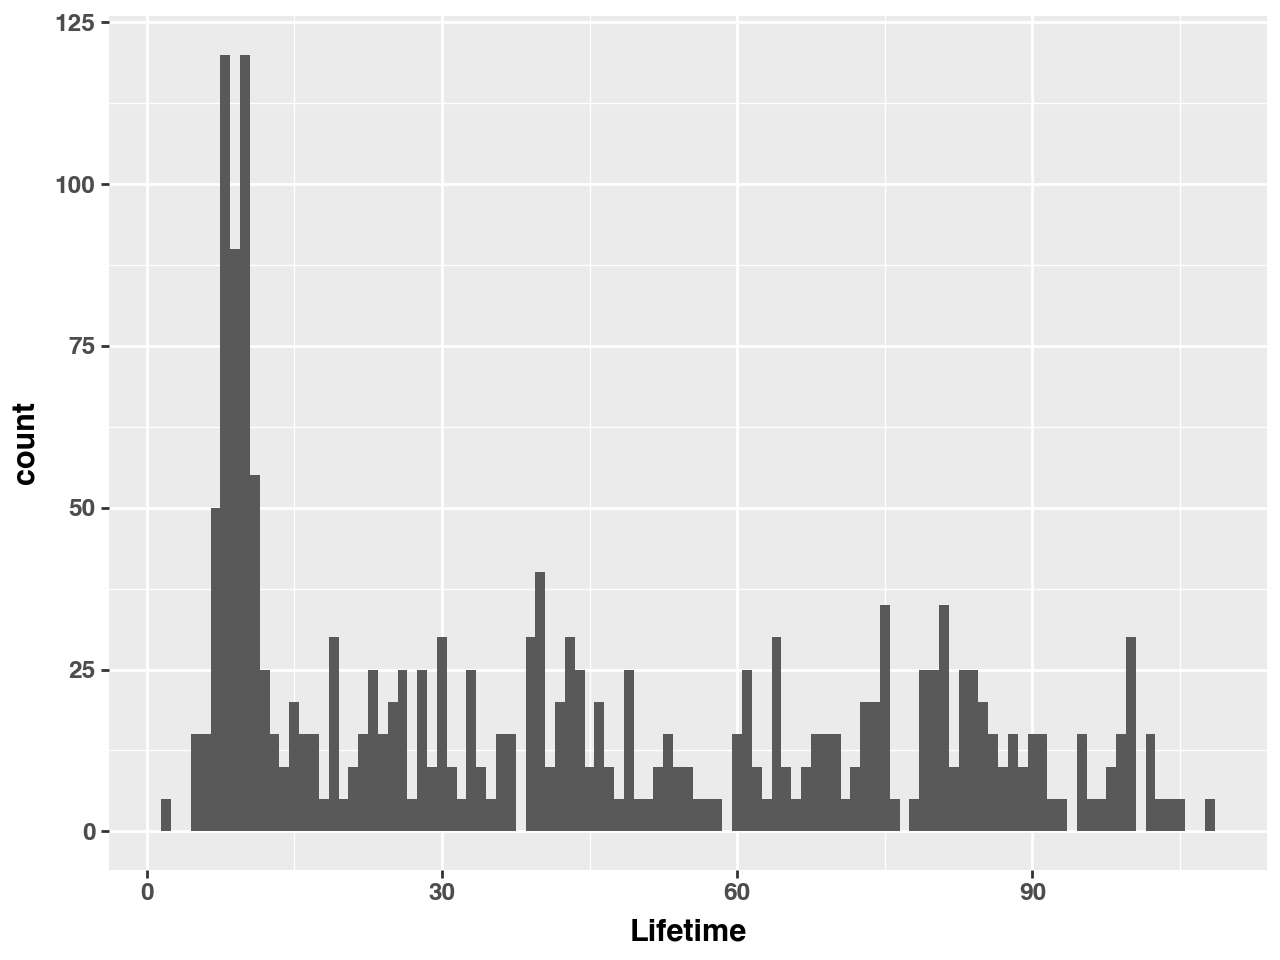

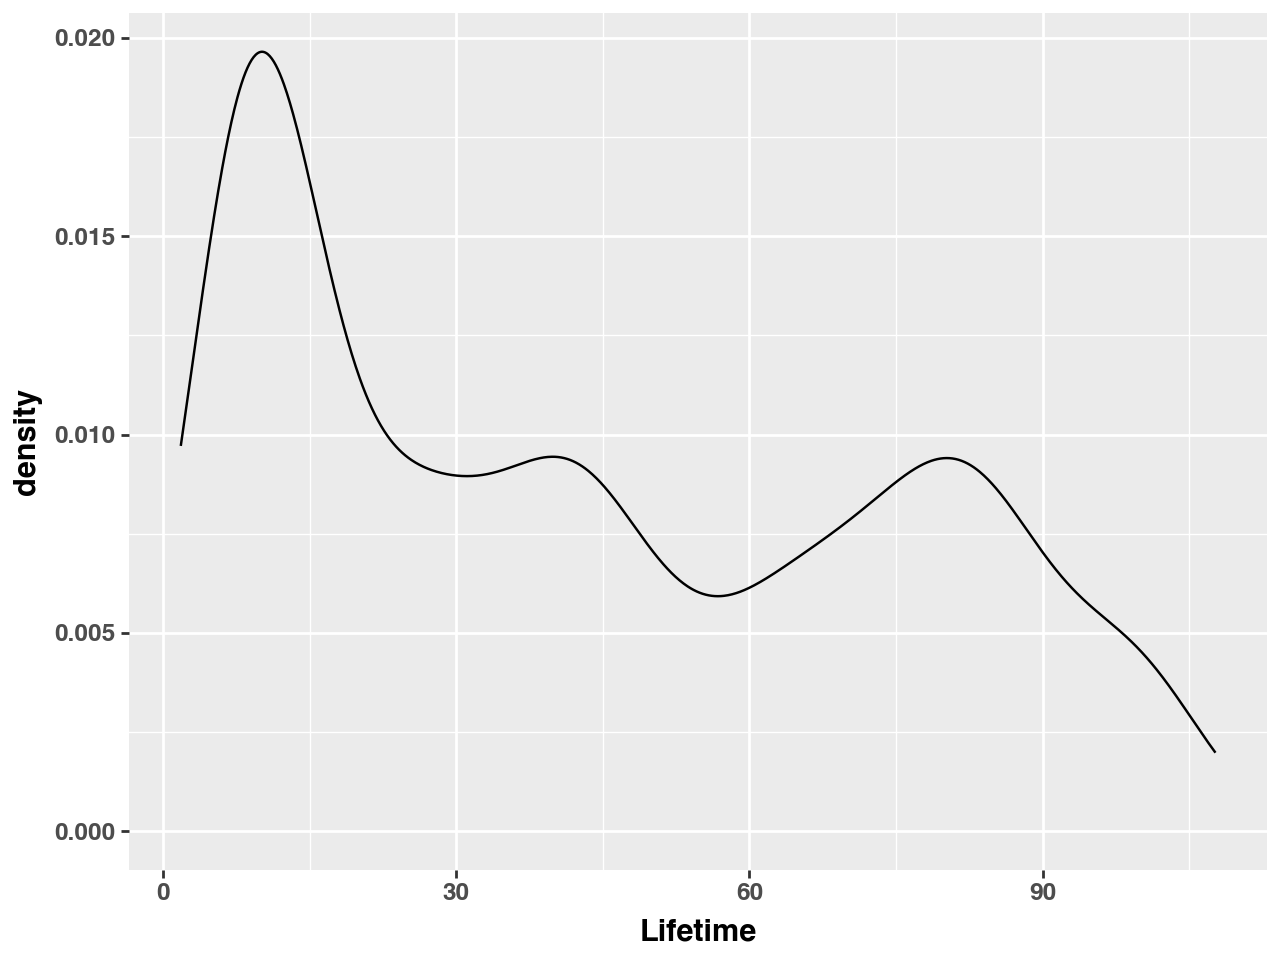

In [8]:
# Simple select query
new_df = pysqldf("""
                 SELECT Lifetime
                 FROM merged_df
                 WHERE Lifetime <= 5000;
                 """)

# Create the plot using ggplot
plot = (
    ggplot(new_df, aes(x="Lifetime")) +
    geom_histogram(binwidth=1)
)
display(plot)

plot = (
    ggplot(new_df, aes(x="Lifetime")) +
    geom_density()
)
display(plot)

In [9]:
df = pysqldf("""
            SELECT Arrival, Departure, Run
            FROM merged_df
            WHERE Arrival != 0
            """)
display(df)


# Get unique runs
unique_runs = df["Run"].unique()

# Dictionary to store results
run_vehicle_counts = {}

for run in unique_runs:
    # Filter data for the specific run
    run_df = df[df["Run"] == run]
    
    # Define time range for this run
    start_time = int(np.floor(run_df["Arrival"].min()))
    end_time = int(np.ceil(run_df["Departure"].max()))
    
    # Compute vehicle count for each second
    vehicle_count = {
        t: ((run_df["Arrival"] <= t) & (run_df["Departure"] > t)).sum()
        for t in range(start_time, end_time + 1)
    }
    
    # Store in dictionary
    run_vehicle_counts[run] = pd.DataFrame(list(vehicle_count.items()), columns=["Time", "VehicleCount"])
    run_vehicle_counts[run]["Run"] = run  # Add run column

# Combine all runs into a single DataFrame
result_df = pd.concat(run_vehicle_counts.values(), ignore_index=True)

# Display first few rows
display(result_df.head())

,Arrival,Departure,Run
0,179.7,187.8,0
1,345.8,381.7,0
2,385.5,428.4,0
3,552.9,635.4,0
4,645.2,655.5,0
...,...,...,...
1790,16765.2,16804.1,4
1791,16795.3,16823.6,4
1792,16804.9,16823.6,4
1793,16819.0,16823.6,4


,Time,VehicleCount,Run
0,179,0,0
1,180,1,0
2,181,1,0
3,182,1,0
4,183,1,0


,Time,VehicleCount,Run
0,179,0,0
1,180,1,0
2,181,1,0
3,182,1,0
4,183,1,0
...,...,...,...
16641,16820,3,0
16642,16821,3,0
16643,16822,4,0
16644,16823,4,0


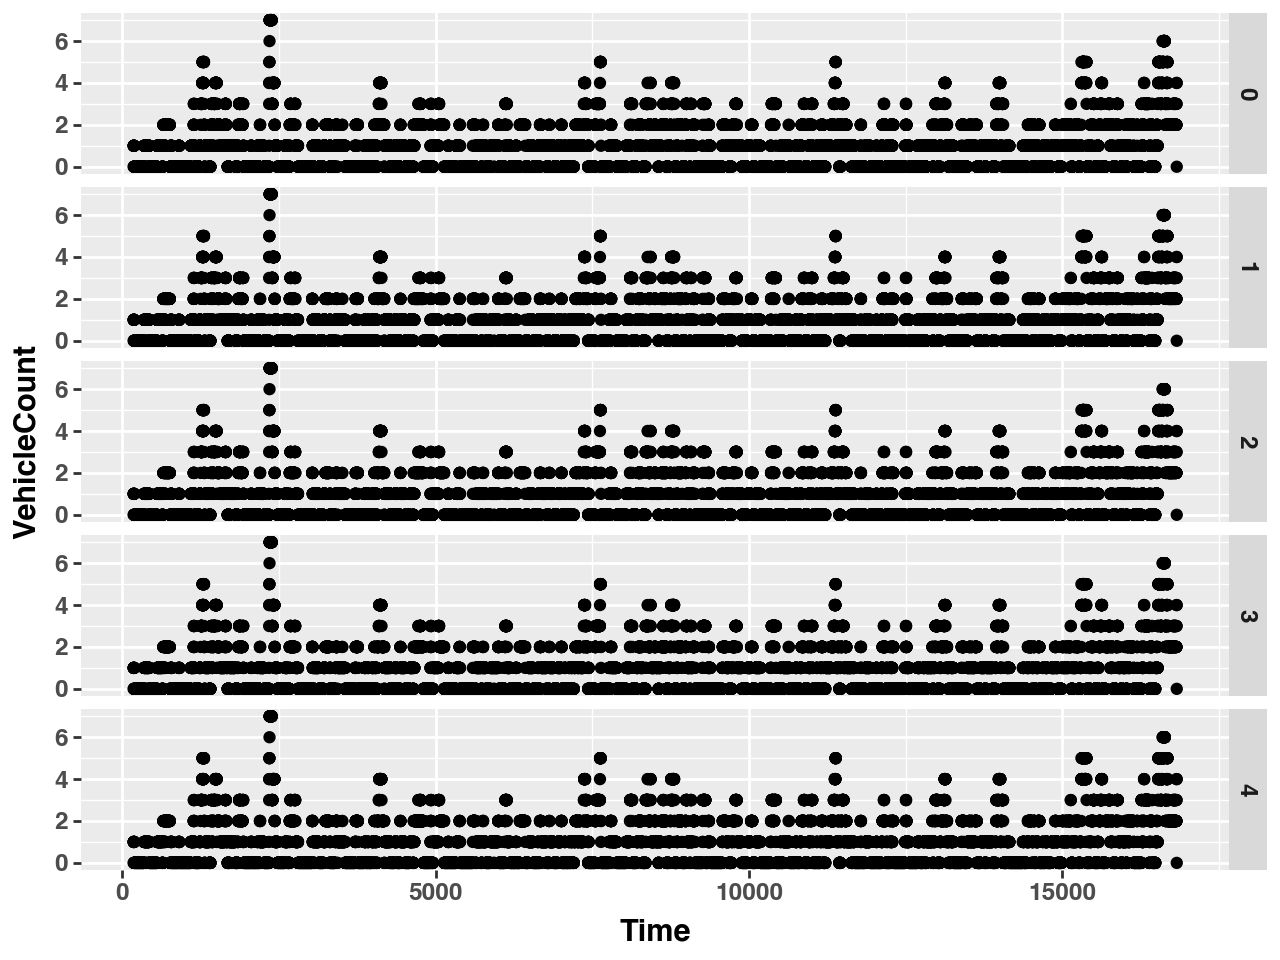

In [10]:
# Example query to only filter out data of Run 0
display(result_df.query('Run == 0'))

plot = (
    ggplot(result_df, aes(x="Time", y="VehicleCount")) +
    # geom_bar(stat = "identity") +
    geom_point() +
    facet_grid(rows="Run")
)
display(plot)